# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | kargopol'
Processing Record 3 of Set 1 | brookings
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | antofagasta
Processing Record 10 of Set 1 | borkum
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kirakira
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | paris
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | tolanaro
Processing Record 19 of Set 1 | bikenibeu village
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | basoko
Processing Record 22 of Set

Processing Record 41 of Set 4 | katabu
Processing Record 42 of Set 4 | bezenchuk
Processing Record 43 of Set 4 | bridlington
Processing Record 44 of Set 4 | kone
Processing Record 45 of Set 4 | rabo de peixe
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | alotau
City not found. Skipping...
Processing Record 48 of Set 4 | timbuktu
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | broken hill
Processing Record 1 of Set 5 | quellon
Processing Record 2 of Set 5 | badger
Processing Record 3 of Set 5 | nadym
Processing Record 4 of Set 5 | yuzhno-kurilsk
Processing Record 5 of Set 5 | cefalu
Processing Record 6 of Set 5 | rongelap
Processing Record 7 of Set 5 | menaka
Processing Record 8 of Set 5 | ta`u
Processing Record 9 of Set 5 | pachperwa
Processing Record 10 of Set 5 | ribeira grande
Processing Record 11 of Set 5 | ryotsu-minato
Processing Record 12 of Set 5 | maramba
Processing Record 13 of Set 5 | ouahigouya
Processing Record 14 of Set 5 | 

Processing Record 35 of Set 8 | harlingen
Processing Record 36 of Set 8 | kayangel
Processing Record 37 of Set 8 | collie
Processing Record 38 of Set 8 | ciudad lazaro cardenas
Processing Record 39 of Set 8 | tazacorte
Processing Record 40 of Set 8 | blankenberge
Processing Record 41 of Set 8 | camiri
Processing Record 42 of Set 8 | jingmen
Processing Record 43 of Set 8 | enewetak
Processing Record 44 of Set 8 | sambava
Processing Record 45 of Set 8 | barbastro
Processing Record 46 of Set 8 | moab
Processing Record 47 of Set 8 | yaren
Processing Record 48 of Set 8 | rawson
Processing Record 49 of Set 8 | piriapolis
Processing Record 0 of Set 9 | constantia
Processing Record 1 of Set 9 | strathalbyn
Processing Record 2 of Set 9 | casper
Processing Record 3 of Set 9 | newman
Processing Record 4 of Set 9 | howrah
Processing Record 5 of Set 9 | sirte
Processing Record 6 of Set 9 | aden
Processing Record 7 of Set 9 | banswada
Processing Record 8 of Set 9 | kujuvar
City not found. Skipping..

Processing Record 24 of Set 12 | hadleigh
Processing Record 25 of Set 12 | neustrelitz
Processing Record 26 of Set 12 | la baneza
Processing Record 27 of Set 12 | pak phanang
Processing Record 28 of Set 12 | usol'ye
Processing Record 29 of Set 12 | kuanda
Processing Record 30 of Set 12 | midvagur
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | kultali
City not found. Skipping...
Processing Record 33 of Set 12 | qarauyl
Processing Record 34 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 35 of Set 12 | afaahiti
Processing Record 36 of Set 12 | puerto armuelles
Processing Record 37 of Set 12 | smithers
Processing Record 38 of Set 12 | yangshuo
Processing Record 39 of Set 12 | jieshi
Processing Record 40 of Set 12 | markovo
Processing Record 41 of Set 12 | basco
Processing Record 42 of Set 12 | pedernales
Processing Record 43 of Set 12 | bandon
Processing Record 44 of Set 12 | ikryanoye
Processing Record 45 of Set 12 | maumere
Processing Record 4

In [4]:
test_url = f"https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"
response = requests.get(test_url).json()
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 284.83, 'feels_like': 284.43, 'temp_min': 283.31, 'temp_max': 286.08, 'pressure': 1002, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 210}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1698782666, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1698735084, 'sunset': 1698770203}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
response = requests.get(city_url)
print(response.json())

{'coord': {'lon': 25.678, 'lat': 8.4596}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.13, 'feels_like': 298.56, 'temp_min': 298.13, 'temp_max': 298.13, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 19, 'gust': 5.19}, 'clouds': {'all': 73}, 'dt': 1698783210, 'sys': {'country': 'SS', 'sunrise': 1698725152, 'sunset': 1698767749}, 'timezone': 7200, 'id': 368246, 'name': 'Raja', 'cod': 200}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,275.01,92,94,1.78,GS,1698782700
1,kargopol',61.5071,38.9456,268.59,94,100,1.98,RU,1698782701
2,brookings,44.3114,-96.7984,271.58,68,8,4.04,US,1698782465
3,waitangi,-43.9535,-176.5597,286.94,96,100,4.92,NZ,1698782702
4,puerto ayora,-0.7393,-90.3518,301.13,74,86,4.17,EC,1698782704


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,275.01,92,94,1.78,GS,1698782700
1,kargopol',61.5071,38.9456,268.59,94,100,1.98,RU,1698782701
2,brookings,44.3114,-96.7984,271.58,68,8,4.04,US,1698782465
3,waitangi,-43.9535,-176.5597,286.94,96,100,4.92,NZ,1698782702
4,puerto ayora,-0.7393,-90.3518,301.13,74,86,4.17,EC,1698782704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

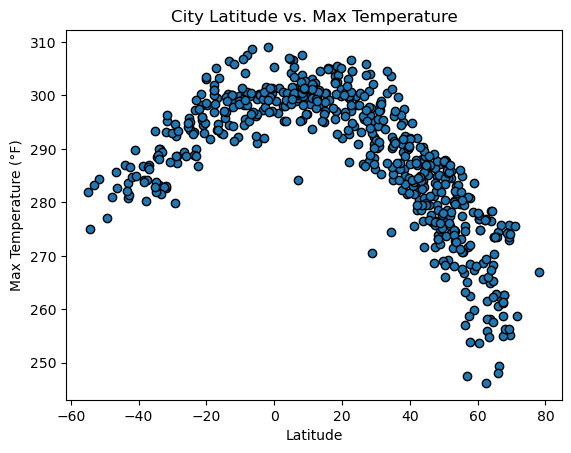

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

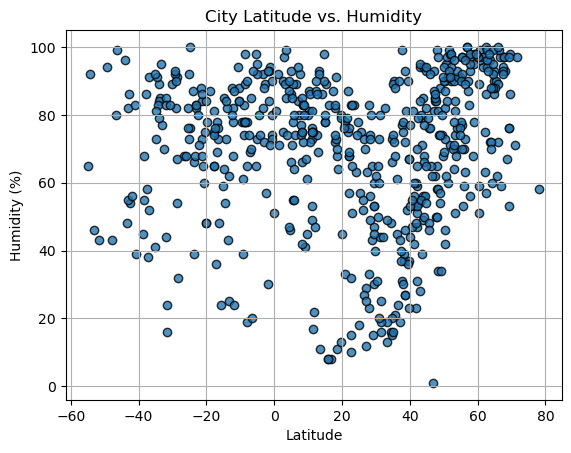

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

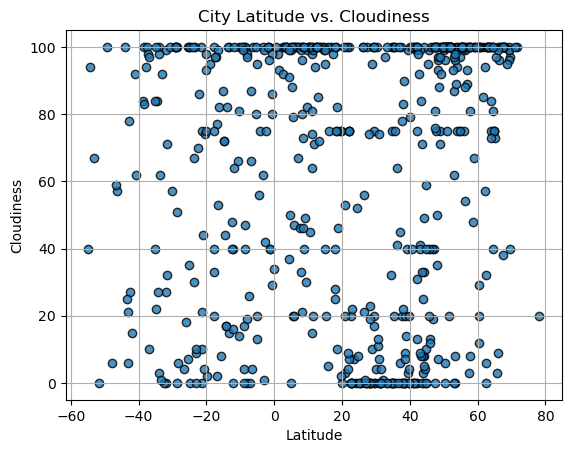

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

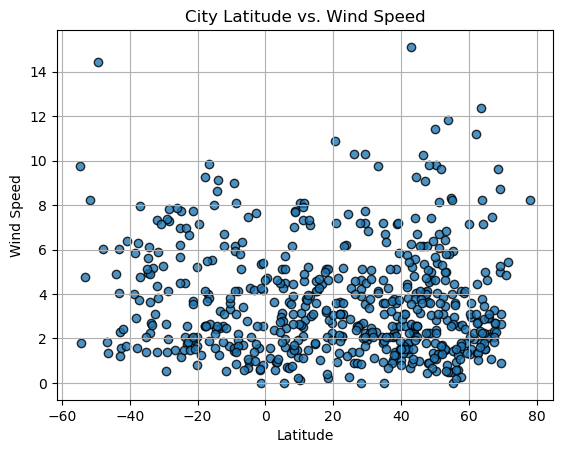

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=14, color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kargopol',61.5071,38.9456,268.59,94,100,1.98,RU,1698782701
2,brookings,44.3114,-96.7984,271.58,68,8,4.04,US,1698782465
5,nar'yan-mar,67.6713,53.0870,262.65,97,100,2.68,RU,1698782706
6,severo-yeniseyskiy,60.3725,93.0408,253.76,97,12,1.31,RU,1698782707
7,isafjordur,66.0755,-23.1240,274.52,72,9,2.21,IS,1698782708


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,275.01,92,94,1.78,GS,1698782700
3,waitangi,-43.9535,-176.5597,286.94,96,100,4.92,NZ,1698782702
4,puerto ayora,-0.7393,-90.3518,301.13,74,86,4.17,EC,1698782704
8,antofagasta,-23.6500,-70.4000,293.10,66,30,4.51,CL,1698782709
10,blackmans bay,-43.0167,147.3167,280.78,82,21,2.31,AU,1698782711


###  Temperature vs. Latitude Linear Regression Plot

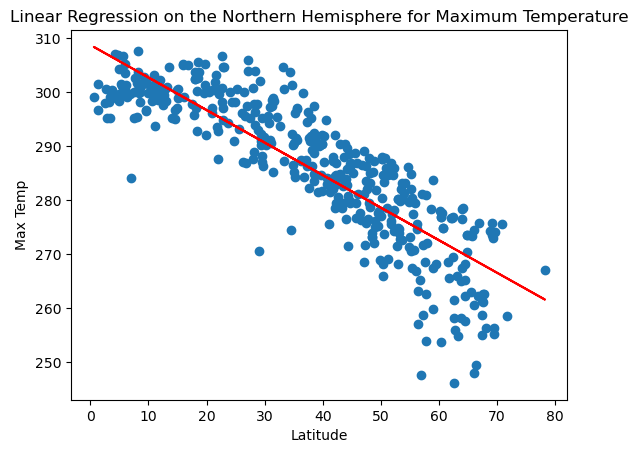

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

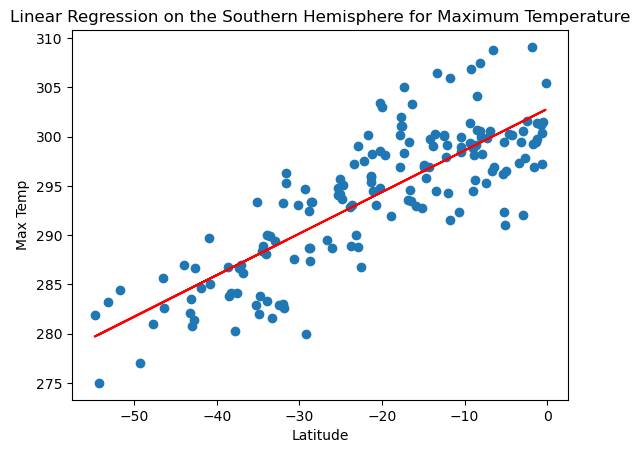

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))

**Discussion about the linear relationship:** The observations are consistent with our understanding of global temperature patterns. The equatorial regions tend to be warmer due to the direct sun rays, while the poles are colder due to the slanting rays of the sun. 

### Humidity vs. Latitude Linear Regression Plot

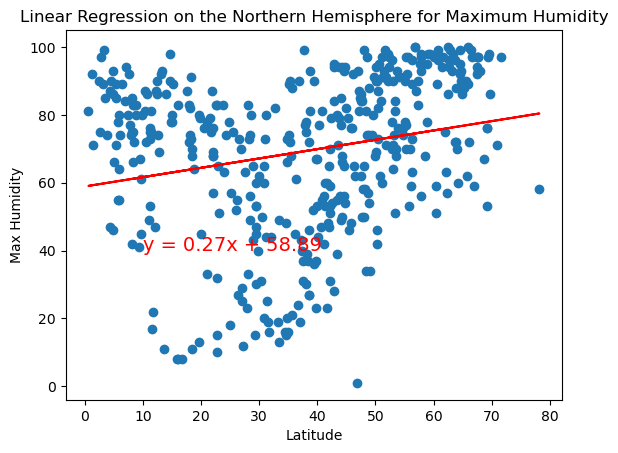

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression on the Northern Hemisphere for Maximum Humidity", "Max Humidity", (10,40))

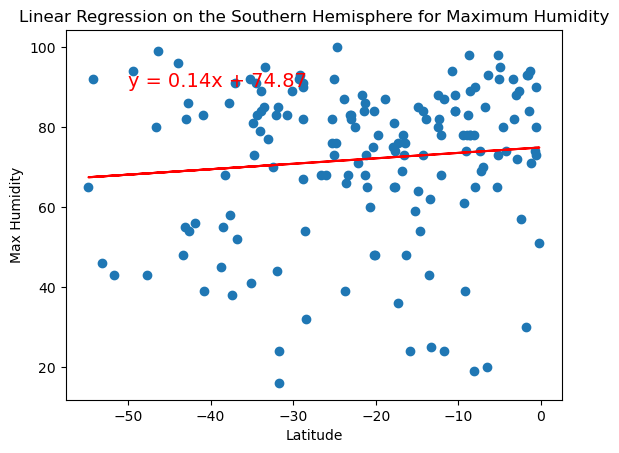

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression on the Southern Hemisphere for Maximum Humidity", "Max Humidity", (-50,90))

**Discussion about the linear relationship:** Both doesn't show distinct patterns related to latitude. Humidity tends to be influenced by various factors such as proximity to oceans, currents, and local weather patterns, etc. 

### Cloudiness vs. Latitude Linear Regression Plot

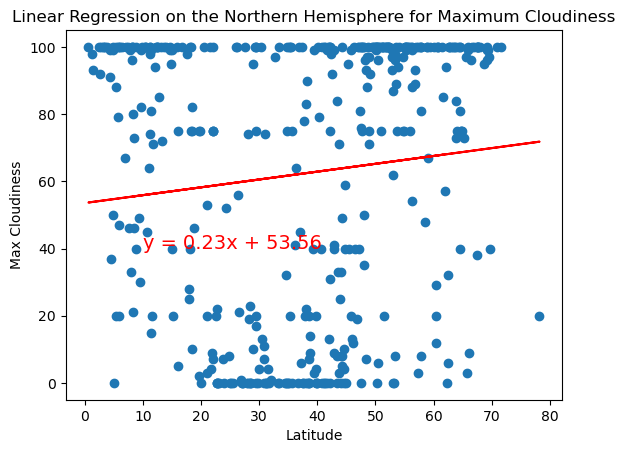

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression on the Northern Hemisphere for Maximum Cloudiness", "Max Cloudiness", (10,40))

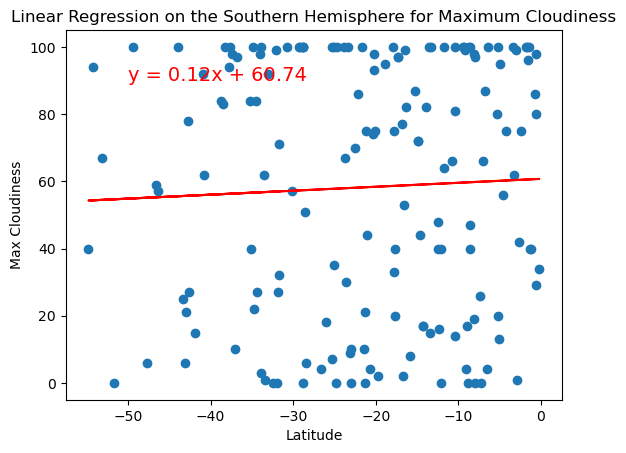

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression on the Southern Hemisphere for Maximum Cloudiness", "Max Cloudiness", (-50,90))

**Discussion about the linear relationship:** Seems like cloudiness scattering all over for both hemisphere. Here, we need to consider the cloud formation usually influenced by multiple factors due to humidity, temperature, wind patterns and geographic figures.

### Wind Speed vs. Latitude Linear Regression Plot

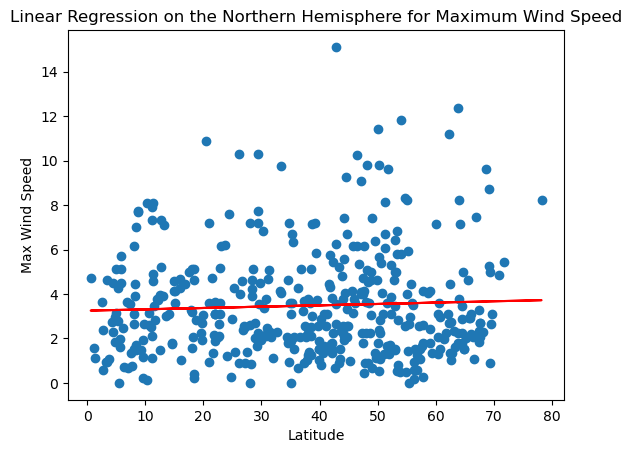

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on the Northern Hemisphere for Maximum Wind Speed", "Max Wind Speed", (10,40))

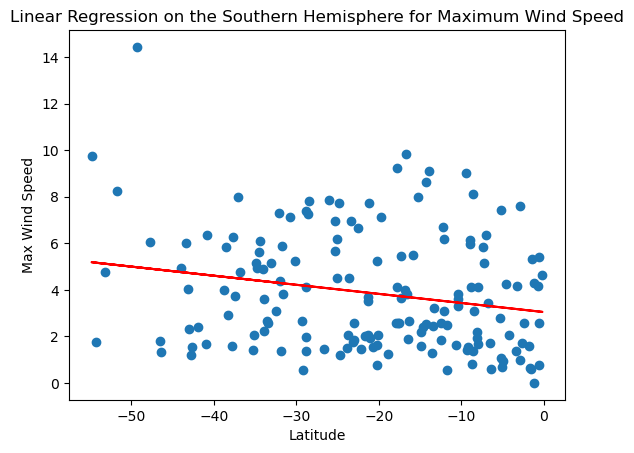

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on the Southern Hemisphere for Maximum Wind Speed", "Max Wind Speed", (-50,90))

**Discussion about the linear relationship:** Wind patterns seems to have stronger speed in the most northern part while the southern part remains stable. Seems like it also depands on the polar vortics, not solely dependent on latitude. 